<a href="https://www.kaggle.com/code/ibrahimnibrahim/brain-tumor-classification-cnn-acc-val-93?scriptVersionId=244213190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/brain-tumor-classification-mri
/kaggle/input/brain-tumor-classification-mri/Training
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor
/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor
/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor
/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor
/kaggle/input/brain-tumor-classification-mri/Testing
/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor
/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor


In [2]:
import cv2
import numpy as np
import os

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for lable in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', lable)
    for path in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, path))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(lable)

for lable in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', lable)
    for path in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, path))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(lable)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
import tensorflow as tf

Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train,X_test,Y_train,Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 101)

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4,activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy',patience=10,verbose=1,mode='max')
lr = ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', patience=3, factor=0.5, min_lr=1e-30, verbose = 2)
mc=ModelCheckpoint(filepath='best.keras',monitor='val_accuracy',save_best_only=True,mode='max')
callback=[es,lr,mc]

In [7]:
history = model.fit(X_train, Y_train,epochs=100,  validation_data=(X_test, Y_test),callbacks=callback)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 261ms/step - accuracy: 0.2866 - loss: 3.0288 - val_accuracy: 0.2557 - val_loss: 1.3490 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.4034 - loss: 1.2969 - val_accuracy: 0.4839 - val_loss: 1.1253 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5695 - loss: 1.0158 - val_accuracy: 0.6217 - val_loss: 0.8362 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6314 - loss: 0.8659 - val_accuracy: 0.6279 - val_loss: 0.8127 - learning_rate: 0.0010
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6738 - loss: 0.7822 - val_accuracy: 0.6876 - val_loss: 0.7459 - learning_rate: 0.0010
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.7342 - loss: 0.6638 - val_accuracy: 0.7519 - val_loss: 0.6169 - learning_rate: 0.0010
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7709 - loss: 0.5790 

In [8]:
best_model = tf.keras.models.load_model('best.keras')
model.evaluate(X_test, Y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9116 - loss: 0.7016


[0.6221200227737427, 0.9050536155700684]

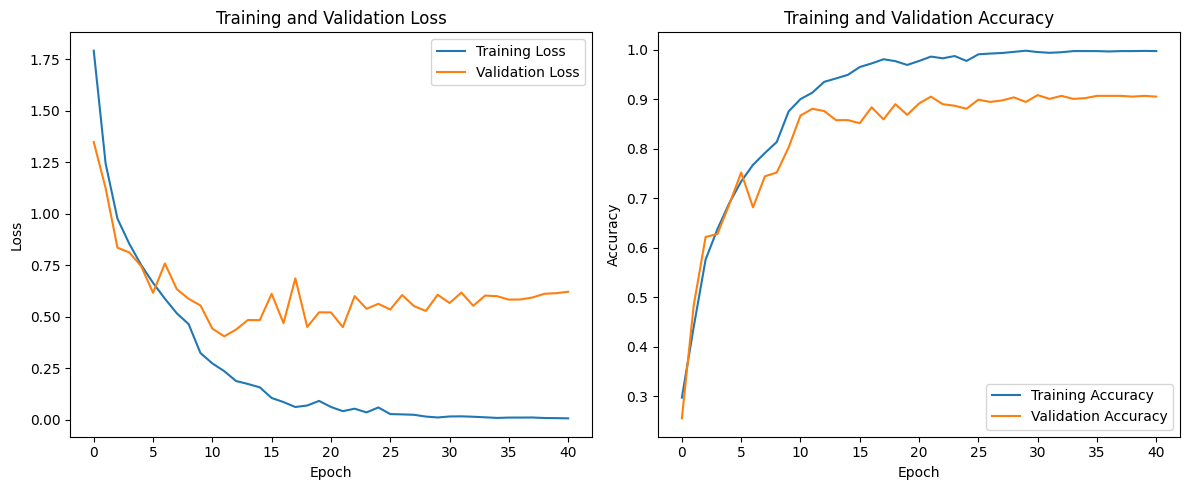

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


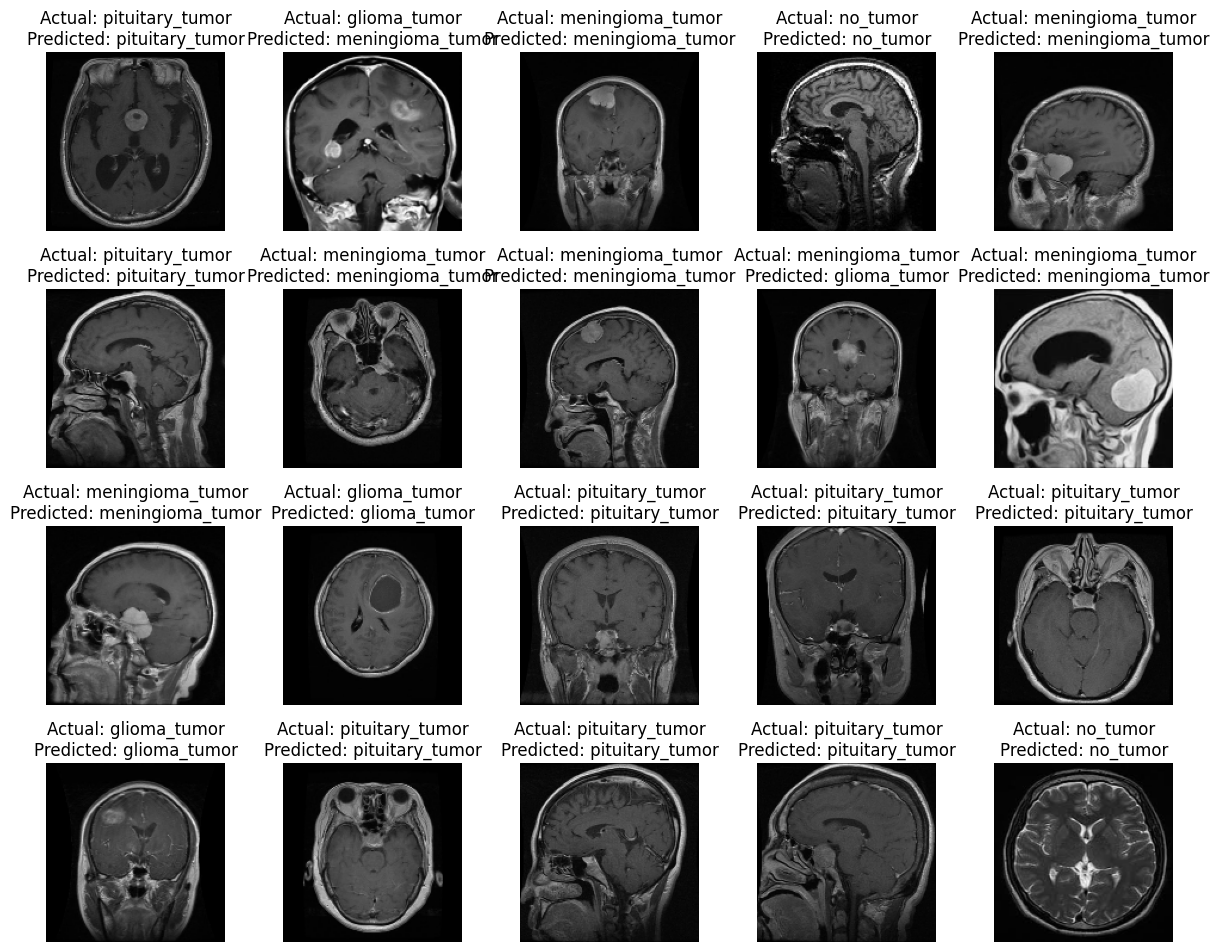

In [10]:
import numpy as np


predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)


num_samples = 20
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[idx].astype('uint8'))
    actual_label_index = np.argmax(Y_test[idx])
    actual_label = labels[actual_label_index]
    predicted_label = labels[predicted_labels[idx]]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()